<img src="../../img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">SpatioTemporal Asset Catalog (STAC)</span>
<hr style="border:2px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through the colaboration of several organizations intended to increase satellite image search interoperability.

The diagram depicted in the picture contains the most important concepts behind the STAC data model:

<img src="../../img/stac/stac-model.png" width="480" />
<br/>
<b>Figura 1</b> - STAC model.

# 1. STAC API
<hr style="border:1px solid #0077b9;">

The STAC API is the dynamic version of a STAC. It returns `STAC Catalog`, `Collection`, `Item`, `ItemCollection` objects through several *endpoints*.

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.

For running the examples in this Jupyter Notebook you will need to install the [STAC client for R](https://github.com/brazil-data-cube/rstac). To install it from the Brazil Data Cube's GitHub repository, you can use `devtools` with the following command:

In [1]:
# load necessary libraries
library(devtools)
install_github("brazil-data-cube/rstac")

Let's import the `rstac` package and complement package, as follows:

In [17]:
library(rstac)    # Package rstac
library(magrittr) # Package to use pipe operator %>%
library(tibble)   # Package to represent data frame structure
library(dplyr)    # Package to handle with data frame
library(raster)   # Package to manipulate raster images

Then, let's create a `RSTACQuery` object called `stac` attached to the service address, which will allow us to comunicate to the given `STAC` service.

In [3]:
stac_obj <- stac("http://brazildatacube.dpi.inpe.br/stac/")

# 2. Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

To list the available image collections and data cube collections we will make a request using the `get_request()` function.

In [4]:
catalog <- stac_obj %>% get_request()

print(catalog)

###STACCatalog
- id: bdc
- description: Brazil Data Cube Catalog
- field(s): description, id, stac_version, links


In [5]:
# visualizing as data frame
lapply(catalog$link, function(x){ list("title" = x$title, "link" = x$href) }) %>% 
    dplyr::bind_rows()

title,link
<chr>,<chr>
Link to this document,http://brazildatacube.dpi.inpe.br/stac/
API documentation in HTML,http://brazildatacube.dpi.inpe.br/stac/docs
OGC API conformance classes implemented by the server,http://brazildatacube.dpi.inpe.br/stac/conformance
Information about image collections,http://brazildatacube.dpi.inpe.br/stac/collections
STAC-Search endpoint,http://brazildatacube.dpi.inpe.br/stac/search
HLS Sentinel-2,http://brazildatacube.dpi.inpe.br/stac/collections/HLS.S30-1
Landsat-8 (OLI) Cube Stack 16 days - v001,http://brazildatacube.dpi.inpe.br/stac/collections/LC8_30_16D_STK-1
HLS Landsat-8,http://brazildatacube.dpi.inpe.br/stac/collections/HLS.L30-1
MODIS MYD13Q1,http://brazildatacube.dpi.inpe.br/stac/collections/MYD13Q1-1


# 3. Retrieving the Metadata of a Data Product
<hr style="border:1px solid #0077b9;">

The `collection` method returns information about a given image or data cube collection identified by its name. In this example we are retrieving inormation about the datacube collection `CB4_64_16D_STK-1`:

In [6]:
collection <- stac_obj %>% collections("CB4_64_16D_STK-1") 
collection_info <- collection %>% get_request()

print(collection_info)

###STACCollection
- id: CB4_64_16D_STK-1
- title: CBERS-4 (AWFI) Cube Stack 16 days - v001
- description: 
This datacube contains the all available images from CBERS-4/AWFI resampled to 64 meters of spatial resolution, reprojected and cropped to BDC_LG grid, composed each 16 days using the best pixel (Stack) composite function.
- field(s): 
id, stac_version, stac_extensions, title, version, deprecated, description, license, properties, extent, bdc:bands_quicklook, bdc:grs, bdc:tiles, bdc:composite_function, cube:dimensions, bdc:crs, bdc:temporal_composition, links


# 4. Retrieving data
<hr style="border:1px solid #0077b9;">

The `items()` function returns a consult given a `bbox` and `datetime`:

In [7]:
item <- collection %>% items(datetime = "2018-08-01/2019-07-31",
                             bbox     = c(-46.62597656250001,-13.19716452328198,-45.03570556640626,-12.297068292853805),
                             limit    = 20) %>% 
                        get_request() 
                                        
                                  
print(item)

###STACItemCollection
- matched feature(s): 24
- features (20 item(s)):
  - CB4_64_16D_STK_v001_022024_2019-07-28_2019-08-12
  - CB4_64_16D_STK_v001_022024_2019-07-12_2019-07-27
  - CB4_64_16D_STK_v001_022024_2019-06-26_2019-07-11
  - CB4_64_16D_STK_v001_022024_2019-06-10_2019-06-25
  - CB4_64_16D_STK_v001_022024_2019-05-25_2019-06-09
  - CB4_64_16D_STK_v001_022024_2019-05-09_2019-05-24
  - CB4_64_16D_STK_v001_022024_2019-04-23_2019-05-08
  - CB4_64_16D_STK_v001_022024_2019-04-07_2019-04-22
  - CB4_64_16D_STK_v001_022024_2019-03-22_2019-04-06
  - CB4_64_16D_STK_v001_022024_2019-03-06_2019-03-21
  - ... with 10 more feature(s).
- field(s): 
stac_version, stac_extensions, type, links, context, features


Let's create a dataframe with the links corresponding to each band, with the function `assets_list`.

In [8]:
items_list <- item %>% assets_list(assets_names = c("BAND13", "BAND14", "BAND15")) %>% 
              tibble::as_tibble()

In [9]:
head(items_list)

date,band,path
<chr>,<chr>,<chr>
2018-09-30T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-09-30_2018-10-15/CB4_64_16D_STK_v001_022024_2018-09-30_2018-10-15_BAND15.tif
2018-10-16T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-10-16_2018-10-31/CB4_64_16D_STK_v001_022024_2018-10-16_2018-10-31_BAND15.tif
2018-11-01T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-11-01_2018-11-16/CB4_64_16D_STK_v001_022024_2018-11-01_2018-11-16_BAND15.tif
2018-11-17T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-11-17_2018-12-02/CB4_64_16D_STK_v001_022024_2018-11-17_2018-12-02_BAND15.tif
2018-12-03T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-12-03_2018-12-18/CB4_64_16D_STK_v001_022024_2018-12-03_2018-12-18_BAND15.tif
2018-12-19T00:00:00,BAND15,/vsicurl/http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-12-19_2018-12-31/CB4_64_16D_STK_v001_022024_2018-12-19_2018-12-31_BAND15.tif


Let's read the images corresponding to the first date.

In [10]:
first_date_blue_url  <- items_list[items_list$band == "BAND13",][1,]
first_date_green_url <- items_list[items_list$band == "BAND14",][1,]
first_date_red_url   <- items_list[items_list$band == "BAND15",][1,]

In [11]:
# reading the first images from each bands
blue_rast  <- raster::raster(first_date_blue_url$path)
green_rast <- raster::raster(first_date_green_url$path)
red_rast   <- raster::raster(first_date_red_url$path)

Let's crop the image with a 1 to 1500 in line and column.

In [12]:
# croping using extent
blue_rast_cropped  <- (raster::crop(blue_rast, raster::extent(blue_rast, 1, 1500, 1, 1500)))
green_rast_cropped <- (raster::crop(green_rast, raster::extent(green_rast, 1, 1500, 1, 1500)))
red_rast_cropped   <- (raster::crop(red_rast, raster::extent(red_rast, 1, 1500, 1, 1500)))

Visualizing each band separately

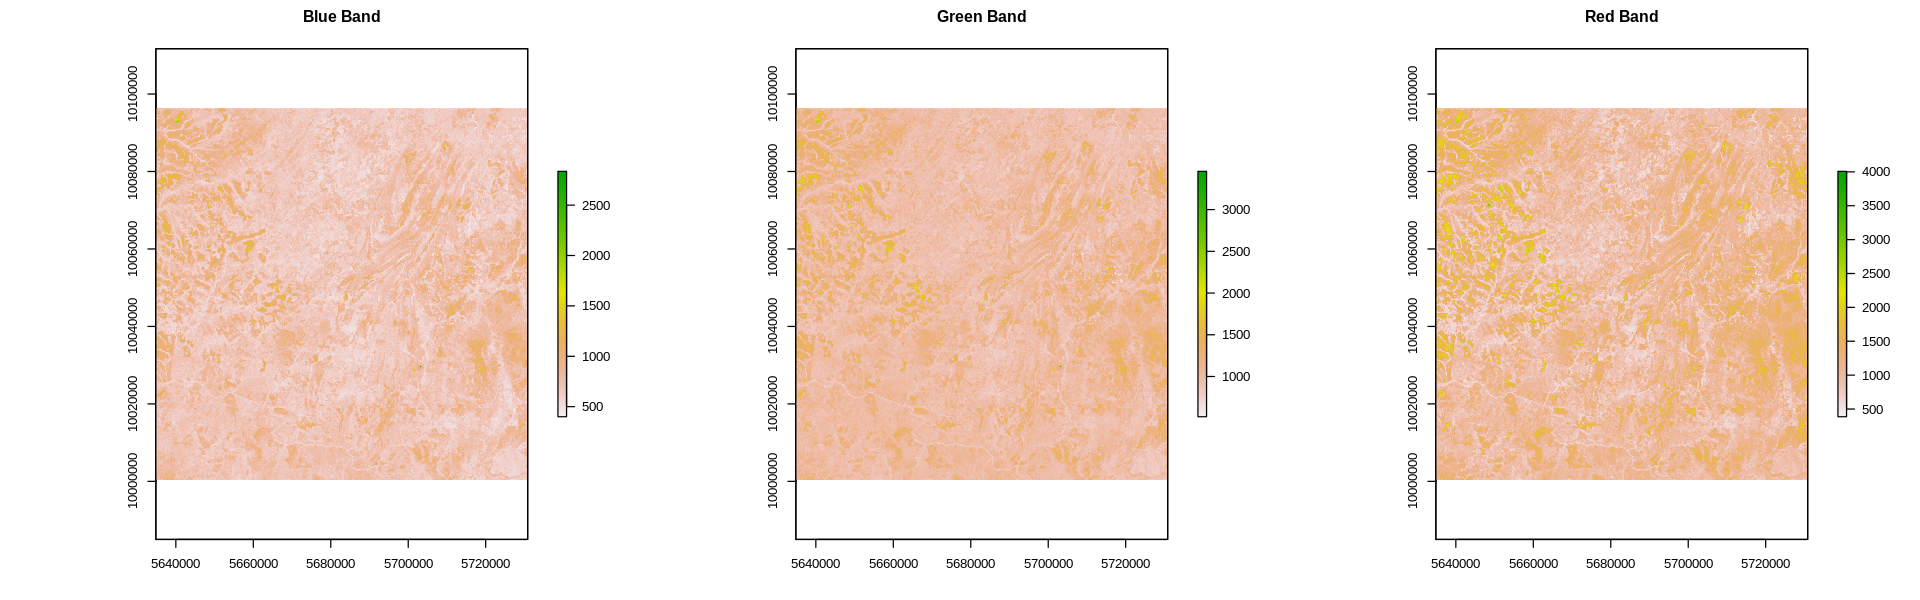

In [13]:
# setting plot display options
options(repr.plot.width = 16, repr.plot.height = 5)
par(mfrow = c(1, 3))

plot(blue_rast_cropped, main = "Blue Band")
plot(green_rast_cropped, main = "Green Band")
plot(red_rast_cropped, main = "Red Band")

# 5. Visualizing Composed Images
<hr style="border:1px solid #0077b9;">

Let's create a band stack to create our composition plot.

In [14]:
rgb <- raster::stack(red_rast_cropped, 
                     blue_rast_cropped, 
                     green_rast_cropped)

In [15]:
rgb

class      : RasterStack 
dimensions : 1500, 1500, 2250000, 3  (nrow, ncol, ncell, nlayers)
resolution : 63.99735, 64.00234  (x, y)
extent     : 5634844, 5730840, 10000356, 10096360  (xmin, xmax, ymin, ymax)
crs        : +proj=aea +lat_1=-2 +lat_2=-22 +lat_0=-12 +lon_0=-54 +x_0=5000000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs 
names      : CB4_64_16D_STK_v001_022024_2018.09.30_2018.10.15_BAND15, CB4_64_16D_STK_v001_022024_2018.09.30_2018.10.15_BAND13, CB4_64_16D_STK_v001_022024_2018.09.30_2018.10.15_BAND14 
min values :                                                     386,                                                     396,                                                     512 
max values :                                                    4007,                                                    3882,                                                    3792 


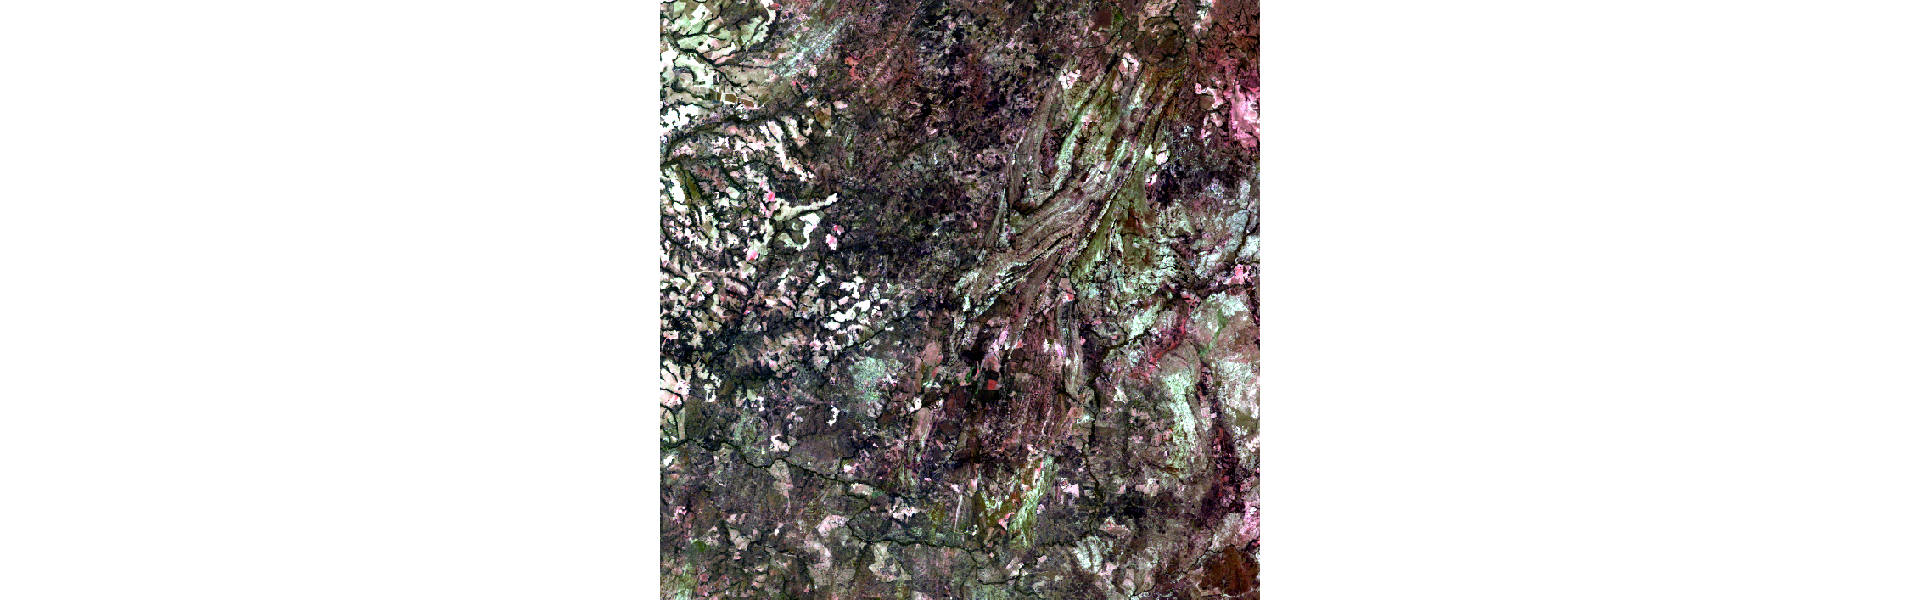

In [16]:
plotRGB(rgb, r = 1, g = 2, b = 3, stretch = "lin")